<a href="https://colab.research.google.com/github/Jorge-89/Serie-Temporal/blob/main/Serie_Temporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red Neuronal

In [59]:
# importo librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('fast')
 
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras


In [60]:
#se importa el set de datos
url = 'https://raw.githubusercontent.com/Jorge-89/Serie-Temporal/main/time_series.csv'
df = pd.read_csv(url, sep=",",  parse_dates=[0], header=None,index_col=0, squeeze=True,names=['fecha','unidades'],)
df.head()




fecha
2017-01-02    236
2017-01-03    237
2017-01-04    290
2017-01-05    221
2017-01-07    128
Name: unidades, dtype: int64

In [36]:
len(df)

604

In [61]:
#colocando la fecha ocmo indice podemos rapidamente tener valores de fechas maximos o minimos
	
print(df.index.min())
print(df.index.max())


2017-01-02 00:00:00
2018-11-30 00:00:00


In [62]:

PASOS=7

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# load dataset
values = df.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.head()


,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
7,-0.314815,-0.311111,-0.114815,-0.370370,-0.714815,-0.103704,-0.225926,-0.433333
8,-0.311111,-0.114815,-0.370370,-0.714815,-0.103704,-0.225926,-0.433333,-0.607407
9,-0.114815,-0.370370,-0.714815,-0.103704,-0.225926,-0.433333,-0.607407,-0.522222
10,-0.370370,-0.714815,-0.103704,-0.225926,-0.433333,-0.607407,-0.522222,-0.644444
11,-0.714815,-0.103704,-0.225926,-0.433333,-0.607407,-0.522222,-0.644444,-0.344444


In [63]:

p_train = 0.80 
values = reframed.values
train = values[:int((len(values))*p_train)] 
test = values[int((len(values))*p_train):]
# split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)


(477, 1, 7) (477,) (120, 1, 7) (120,)


In [72]:
test

array([[-0.8111111 , -0.08518517, -0.16296303,  0.24444437, -0.0592593 ,
        -0.21481484, -0.5666667 ,  0.08518517],
       [-0.08518517, -0.16296303,  0.24444437, -0.0592593 , -0.21481484,
        -0.5666667 ,  0.08518517, -0.12962961],
       [-0.16296303,  0.24444437, -0.0592593 , -0.21481484, -0.5666667 ,
         0.08518517, -0.12962961, -0.13703704],
       [ 0.24444437, -0.0592593 , -0.21481484, -0.5666667 ,  0.08518517,
        -0.12962961, -0.13703704, -0.23333335],
       [-0.0592593 , -0.21481484, -0.5666667 ,  0.08518517, -0.12962961,
        -0.13703704, -0.23333335, -0.48888892],
       [-0.21481484, -0.5666667 ,  0.08518517, -0.12962961, -0.13703704,
        -0.23333335, -0.48888892, -0.5592593 ],
       [-0.5666667 ,  0.08518517, -0.12962961, -0.13703704, -0.23333335,
        -0.48888892, -0.5592593 ,  0.0925926 ],
       [ 0.08518517, -0.12962961, -0.13703704, -0.23333335, -0.48888892,
        -0.5592593 ,  0.0925926 ,  0.15555549],
       [-0.12962961, -0.13703704

In [69]:
y_val

array([ 0.08518517, -0.12962961, -0.13703704, -0.23333335, -0.48888892,
       -0.5592593 ,  0.0925926 ,  0.15555549,  0.55555546,  0.2888888 ,
       -0.50000006, -0.0592593 ,  0.15185177, -0.0925926 , -0.04814816,
        0.12222219, -0.13333333, -0.60370374,  0.43333328,  0.16296291,
       -0.01481485, -0.04074073, -0.22962964, -0.562963  ,  0.2555555 ,
       -0.07407415,  0.31851852, -0.39629632,  0.51851845,  0.04074073,
       -0.0925926 ,  0.03703701,  0.        , -0.49259263,  0.07777774,
       -0.08518517, -0.09629631, -0.23333335,  0.07777774, -0.0925926 ,
       -0.8148148 , -0.11111116, -0.16666675, -0.3777778 ,  0.01851845,
       -0.29259264, -0.5555556 , -0.15185189, -0.3703704 , -0.41111112,
       -0.31851858, -0.27037042, -0.61111116, -0.02962971, -0.34444445,
       -0.27407414, -0.3888889 , -0.5074074 , -0.77037036, -0.08518517,
       -0.35185188, -0.1851852 , -0.29259264, -0.00740743, -0.40000004,
       -0.88518524, -0.05185187, -0.23333335, -0.16666675, -0.28

In [70]:
x_val

array([[[-0.8111111 , -0.08518517, -0.16296303,  0.24444437,
         -0.0592593 , -0.21481484, -0.5666667 ]],

       [[-0.08518517, -0.16296303,  0.24444437, -0.0592593 ,
         -0.21481484, -0.5666667 ,  0.08518517]],

       [[-0.16296303,  0.24444437, -0.0592593 , -0.21481484,
         -0.5666667 ,  0.08518517, -0.12962961]],

       [[ 0.24444437, -0.0592593 , -0.21481484, -0.5666667 ,
          0.08518517, -0.12962961, -0.13703704]],

       [[-0.0592593 , -0.21481484, -0.5666667 ,  0.08518517,
         -0.12962961, -0.13703704, -0.23333335]],

       [[-0.21481484, -0.5666667 ,  0.08518517, -0.12962961,
         -0.13703704, -0.23333335, -0.48888892]],

       [[-0.5666667 ,  0.08518517, -0.12962961, -0.13703704,
         -0.23333335, -0.48888892, -0.5592593 ]],

       [[ 0.08518517, -0.12962961, -0.13703704, -0.23333335,
         -0.48888892, -0.5592593 ,  0.0925926 ]],

       [[-0.12962961, -0.13703704, -0.23333335, -0.48888892,
         -0.5592593 ,  0.0925926 ,  0.15555

In [73]:
#Defino la función neuronal
def define_model():
    keras.backend.clear_session()
    
    model = keras.models.Sequential()

 
    

    # 2 capas ocultas con función de activación linear, podemos usar tambien relu.
     
               
    model.add(keras.layers.Dense(7, input_shape=(1,PASOS), kernel_initializer='normal', activation='tanh'))
    model.add(Flatten())

   

    

    # Capa de salida
    model.add(keras.layers.Dense(1,kernel_initializer='normal', activation='tanh'))
    model.compile(loss='mae', metrics=['mse'], optimizer="adam")

   
    return model

In [74]:
model = define_model()
# Hago una corrida sin metodo de regularizacion.  
history = model.fit(epochs=200, batch_size=32, x=x_train, y=y_train, validation_data=(x_val, y_val) )
#                     callbacks=[early,])

Epoch 1/200
15/15 [==============================] - 1s 12ms/step - loss: 0.4221 - mse: 0.2317 - val_loss: 0.3338 - val_mse: 0.1629
Epoch 2/200
15/15 [==============================] - 0s 3ms/step - loss: 0.3877 - mse: 0.2012 - val_loss: 0.3059 - val_mse: 0.1408
Epoch 3/200
15/15 [==============================] - 0s 3ms/step - loss: 0.3422 - mse: 0.1644 - val_loss: 0.2709 - val_mse: 0.1153
Epoch 4/200
15/15 [==============================] - 0s 4ms/step - loss: 0.2851 - mse: 0.1240 - val_loss: 0.2343 - val_mse: 0.0912
Epoch 5/200
15/15 [==============================] - 0s 3ms/step - loss: 0.2323 - mse: 0.0899 - val_loss: 0.2077 - val_mse: 0.0757
Epoch 6/200
15/15 [==============================] - 0s 3ms/step - loss: 0.1989 - mse: 0.0694 - val_loss: 0.1982 - val_mse: 0.0703
Epoch 7/200
15/15 [==============================] - 0s 3ms/step - loss: 0.1901 - mse: 0.0617 - val_loss: 0.1996 - val_mse: 0.0701
Epoch 8/200
15/15 [==============================] - 0s 4ms/step - loss: 0.1894 - 

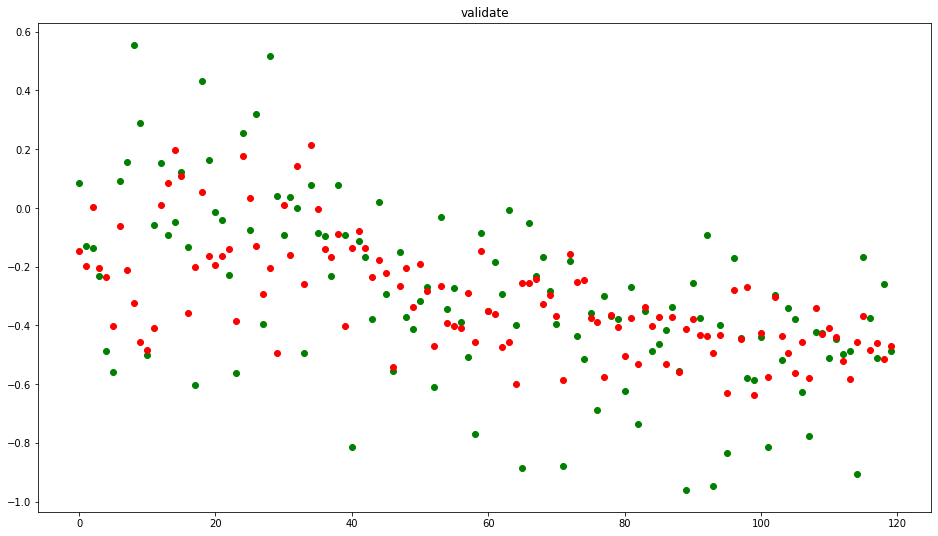

In [42]:

results=model.predict(x_val)
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()


In [66]:
results

[array([-0.0268331], dtype=float32),
 array([-0.5121841], dtype=float32),
 array([0.439188], dtype=float32),
 array([0.37113717], dtype=float32),
 array([-0.0141951], dtype=float32),
 array([0.2520436], dtype=float32),
 array([-0.02447232], dtype=float32)]

In [67]:
y_val

array([ 0.08518517, -0.12962961, -0.13703704, -0.23333335, -0.48888892,
       -0.5592593 ,  0.0925926 ,  0.15555549,  0.55555546,  0.2888888 ,
       -0.50000006, -0.0592593 ,  0.15185177, -0.0925926 , -0.04814816,
        0.12222219, -0.13333333, -0.60370374,  0.43333328,  0.16296291,
       -0.01481485, -0.04074073, -0.22962964, -0.562963  ,  0.2555555 ,
       -0.07407415,  0.31851852, -0.39629632,  0.51851845,  0.04074073,
       -0.0925926 ,  0.03703701,  0.        , -0.49259263,  0.07777774,
       -0.08518517, -0.09629631, -0.23333335,  0.07777774, -0.0925926 ,
       -0.8148148 , -0.11111116, -0.16666675, -0.3777778 ,  0.01851845,
       -0.29259264, -0.5555556 , -0.15185189, -0.3703704 , -0.41111112,
       -0.31851858, -0.27037042, -0.61111116, -0.02962971, -0.34444445,
       -0.27407414, -0.3888889 , -0.5074074 , -0.77037036, -0.08518517,
       -0.35185188, -0.1851852 , -0.29259264, -0.00740743, -0.40000004,
       -0.88518524, -0.05185187, -0.23333335, -0.16666675, -0.28

In [47]:
adimen = [x for x in results]    
inverted = scaler.inverse_transform(adimen)
inverted

array([[281.1856856 ],
       [267.15334948],
       [322.0717695 ],
       [265.90749019],
       [257.81503746],
       [212.77272214],
       [304.02601877],
       [263.67470001],
       [233.89911767],
       [197.76234261],
       [190.39174476],
       [210.88643179],
       [323.70129964],
       [343.90023892],
       [374.6271237 ],
       [350.24948844],
       [224.67346649],
       [266.94040756],
       [335.68290656],
       [276.61402253],
       [268.38474495],
       [276.36630711],
       [283.59504293],
       [217.12076542],
       [368.92111954],
       [329.80186916],
       [285.92929705],
       [241.99239116],
       [265.44356592],
       [187.61769418],
       [323.30840471],
       [277.53123745],
       [359.35540582],
       [250.61852839],
       [378.82663429],
       [319.76845692],
       [283.02560324],
       [275.57147737],
       [297.31507738],
       [212.60264058],
       [284.4921453 ],
       [299.59721149],
       [284.54413456],
       [257

In [55]:
ultimosDias = df['2018-11-16':'2018-11-30']


In [49]:

values = ultimosDias.values
values = values.astype('float32')
# normalize features
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.drop(reframed.columns[[7]], axis=1, inplace=True)
reframed.head(7)

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
7,-0.24,-0.65,0.31,0.30,0.07,0.24,0.11
8,-0.65,0.31,0.30,0.07,0.24,0.11,0.13
9,0.31,0.30,0.07,0.24,0.11,0.13,-1.00
10,0.30,0.07,0.24,0.11,0.13,-1.00,1.00
11,0.07,0.24,0.11,0.13,-1.00,1.00,0.44
12,0.24,0.11,0.13,-1.00,1.00,0.44,0.07
13,0.11,0.13,-1.00,1.00,0.44,0.07,0.75


In [50]:
values = reframed.values
x_test = values[6:, :]
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
x_test

array([[[ 0.11000001,  0.13      , -1.        ,  1.        ,
          0.44000006,  0.06999993,  0.75      ]]], dtype=float32)

In [51]:

def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test
 
results=[]
for i in range(7):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[ 0.11000001  0.13       -1.          1.          0.44000006
    0.06999993  0.75      ]]]
[[[ 0.13       -1.          1.          0.44000006  0.06999993
    0.75       -0.0268331 ]]]
[[[-1.          1.          0.44000006  0.06999993  0.75
   -0.0268331  -0.5121841 ]]]
[[[ 1.          0.44000006  0.06999993  0.75       -0.0268331
   -0.5121841   0.439188  ]]]
[[[ 0.44000006  0.06999993  0.75       -0.0268331  -0.5121841
    0.439188    0.37113717]]]
[[[ 0.06999993  0.75       -0.0268331  -0.5121841   0.439188
    0.37113717 -0.0141951 ]]]
[[[ 0.75       -0.0268331  -0.5121841   0.439188    0.37113717
   -0.0141951   0.2520436 ]]]


In [53]:
adimen = [x for x in results]    
inverted = scaler.inverse_transform(adimen)
inverted

array([[173.31669252],
       [124.78159349],
       [219.91880432],
       [213.11372101],
       [174.58049281],
       [201.20436403],
       [173.55277088]])

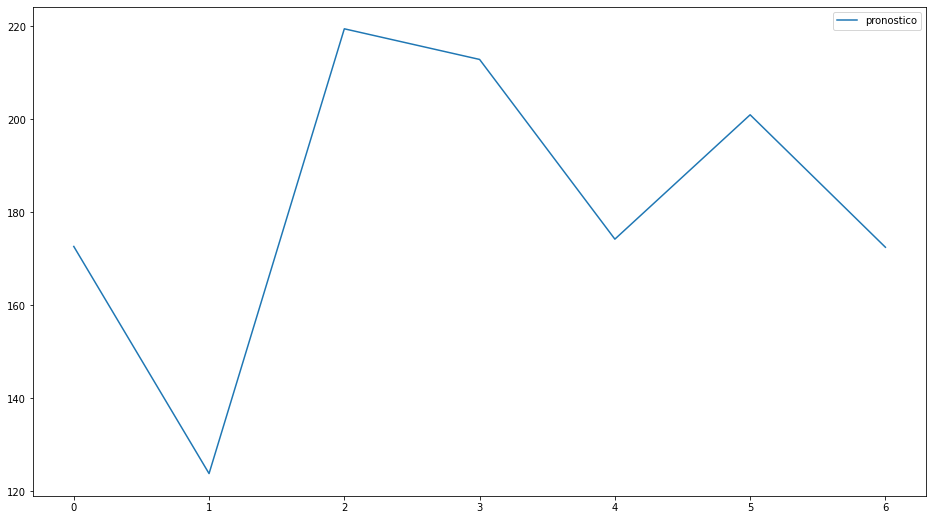

In [126]:

prediccion1SemanaDiciembre = pd.DataFrame(inverted)
prediccion1SemanaDiciembre.columns = ['pronostico']
prediccion1SemanaDiciembre.plot()
prediccion1SemanaDiciembre.to_csv('pronostico.csv')

#Regresión Lineal

In [1]:
# importo librerias necesarias
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.pipeline import Pipeline
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [11]:
#se importa el set de datos
url = 'https://raw.githubusercontent.com/Jorge-89/Serie-Temporal/main/time_series.csv'
df = pd.read_csv(url, sep=",",  parse_dates=[0], header=None,index_col=0, squeeze=True,names=['fecha','unidades'],)
df.head(7)




fecha
2017-01-02    236
2017-01-03    237
2017-01-04    290
2017-01-05    221
2017-01-07    128
2017-01-09    293
2017-01-10    260
Name: unidades, dtype: int64

In [5]:
PASOS=7

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# load dataset
values = df.values
# ensure all data is float
values = values.astype('float32')
# normalize features
#scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
#scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(values, PASOS, 1)
reframed.head()


,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
7,236.0,237.0,290.0,221.0,128.0,293.0,260.0,204.0
8,237.0,290.0,221.0,128.0,293.0,260.0,204.0,157.0
9,290.0,221.0,128.0,293.0,260.0,204.0,157.0,180.0
10,221.0,128.0,293.0,260.0,204.0,157.0,180.0,147.0
11,128.0,293.0,260.0,204.0,157.0,180.0,147.0,228.0


In [26]:

p_train = 0.80 
values = reframed.values
train = values[:int((len(values))*p_train)] 
test = values[int((len(values))*p_train):]
# split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]


In [27]:
x_train

array([[236., 237., 290., ..., 128., 293., 260.],
       [237., 290., 221., ..., 293., 260., 204.],
       [290., 221., 128., ..., 260., 204., 157.],
       ...,
       [234., 322., 230., ..., 298., 277., 387.],
       [322., 230., 102., ..., 277., 387., 305.],
       [230., 102., 298., ..., 387., 305., 263.]], dtype=float32)

In [29]:
lr = linear_model.LinearRegression()



#Entreno el modelo
lr.fit(x_train, y_train)



LinearRegression()

In [32]:
#Realizo una predicción
y_pred = lr.predict(x_val)
y_pred

array([252.55136, 274.21872, 304.83032, 292.12192, 259.41248, 225.65733,
       276.57068, 270.56042, 248.46129, 233.23325, 214.06833, 228.07278,
       297.7396 , 329.10532, 368.8314 , 351.9118 , 253.41724, 266.7266 ,
       320.92923, 287.38385, 275.0271 , 301.86978, 285.91882, 237.23279,
       327.3092 , 331.60477, 291.8076 , 274.99506, 265.3982 , 221.13269,
       293.63177, 313.04874, 331.0174 , 280.77444, 344.19177, 328.2297 ,
       283.60703, 290.5661 , 291.96793, 238.01587, 273.7226 , 300.07977,
       278.39337, 255.25647, 280.98407, 266.86392, 190.98909, 238.65674,
       261.63245, 236.9474 , 266.24863, 248.11282, 204.58426, 238.17067,
       226.97758, 212.93813, 224.43639, 234.72728, 208.8552 , 254.09828,
       235.82571, 221.7568 , 212.77538, 196.75716, 169.06587, 235.68398,
       256.84436, 244.60135, 235.65727, 256.67963, 229.71257, 171.31337,
       244.61292, 255.48784, 244.6922 , 235.68929, 211.03157, 164.75278,
       207.92398, 213.13705, 194.0341 , 210.23898, 

In [33]:
y_val

array([344., 286., 284., 258., 189., 170., 346., 363., 471., 399., 186.,
       305., 362., 296., 308., 354., 285., 158., 438., 365., 317., 310.,
       259., 169., 390., 301., 407., 214., 461., 332., 296., 331., 321.,
       188., 342., 298., 295., 258., 342., 296., 101., 291., 276., 219.,
       326., 242., 171., 280., 221., 210., 235., 248., 156., 313., 228.,
       247., 216., 184., 113., 298., 226., 271., 242., 319., 213.,  82.,
       307., 258., 276., 245., 214.,  84., 272., 203., 182., 224., 135.,
       240., 222., 219., 153., 248., 122., 226., 189., 196., 209., 230.,
       171.,  62., 252., 220., 296.,  65., 213.,  96., 275., 201., 165.,
       163., 202., 101., 241., 181., 229., 219., 152., 111., 207., 206.,
       183., 200., 187., 189.,  76., 276., 220., 183., 251., 189.],
      dtype=float32)